# APS1070
#### Linear Regression - Project 4

Please fill out the following:


*   Your **name**: 
*   Your **student number**: 



## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = mX + c$

This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the c term? It is included within the X matrix.

**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:

<img src="https://miro.medium.com/max/313/1*A32yDrkQKIU0Z-Nf7JD9Pg.png">

- Y is the predicted value ($h_\theta(x)$)
- θ₀ is the bias term.
- θ₁,…,θₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:

<img src="https://miro.medium.com/max/300/1*_y5QA1yF4w6LDDRxfTt6GA.jpeg">

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ from $y = mX + c$:

<img src="https://miro.medium.com/max/400/1*3cpC7oHy4IbH3o3Jc-ygVw.jpeg">

Partial Derivative of the above equation with respect to m is shown as $D_m$:

<img src="https://miro.medium.com/max/400/1*FvYfCBrl2gX9K-KxSO1eIw.jpeg">

While the Partial Derivative with respect to c is shown as $D_c$:

<img src="https://miro.medium.com/max/300/1*rj09w2TcBxnHPtQ0oq4ehA.jpeg">

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (m and c), the derivative of cost function with respect to the parameters would be zero.

$D_m=0$ and $D_c=0$

The solution for the general case comes out to be:

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/closed-form.png">

With $L_2$ Regularization. Cost:

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$

$w = (X^TX + \lambda I)^{-1}X^Ty$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters m and c. 

<img src="https://miro.medium.com/max/300/1*JDcHqFK8jLcgQu1cj2XuVQ.jpeg">

Here the term $L$ is defined as the learning rate.

<img src="https://miro.medium.com/max/864/1*CjTBNFUEI_IokEOXJ00zKw.gif">

#### Any other solutions methods?

Some other solution methods are QR Decomposition, Singular-Value Decomposition.

- Do these methods give exact solutions?
- Do these methods scale well with large datasets?

## Let's Start

Single Feature, 5 data points.

### Analytical Approach in Code

Let's get our hands dirty.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [0]:
n = 5 # number of points
m = 2 # slope of line
c = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x = r * np.random.rand(n)
x.sort()
yPerf = m*x + c # perfect world: no noise
y = m*x + c + np.random.randn(n) # imperfect world: we get noisy data

Spoiler Alert: We are in an Imperfect World.

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

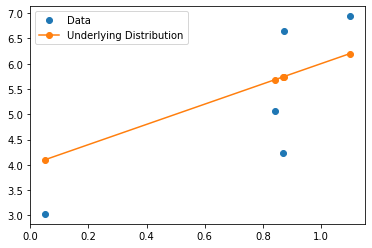

In [0]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, w)

In [0]:
w[0], w[1]

(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

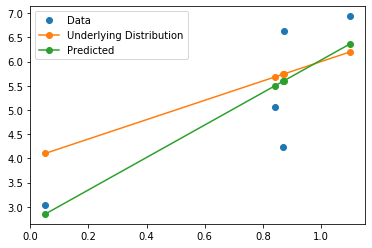

In [0]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
y

array([[3.02924941],
       [5.0642481 ],
       [4.2402827 ],
       [6.63756941],
       [6.93819559]])

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360432


### Complex Dependant Variable

It's complicated.

In [0]:
n = 20 # number of points
m = 3  # slope of line
c = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

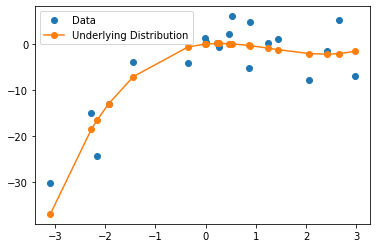

In [0]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
X = np.vstack((np.ones(np.shape(X)), X)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, w)

w

array([[-5.45917353],
       [ 3.82202654]])

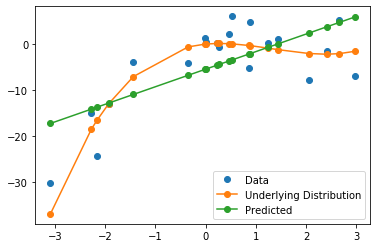

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681816


#### What to do next?

Can we add more features.

In [0]:
X = np.vstack((X.T, xD**2, xD**3)).T

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, w)

In [0]:
w

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

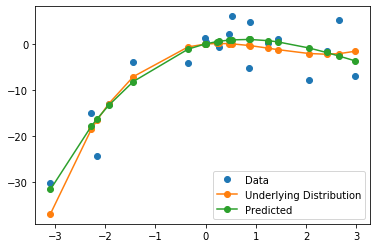

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [0]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, w)

In [0]:
w

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

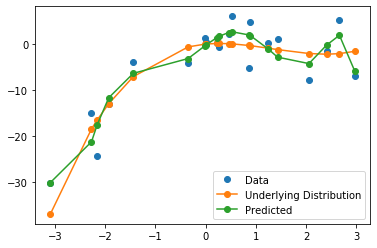

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929725


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [0]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, w)
w

array([[ 0.21326186],
       [ 0.40727946],
       [-0.46745243],
       [-0.31891582],
       [-0.51080301],
       [ 0.38864889],
       [ 0.03613141],
       [-0.03367748]])

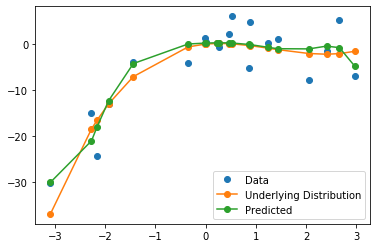

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 

What does low test error represent?

All models together:

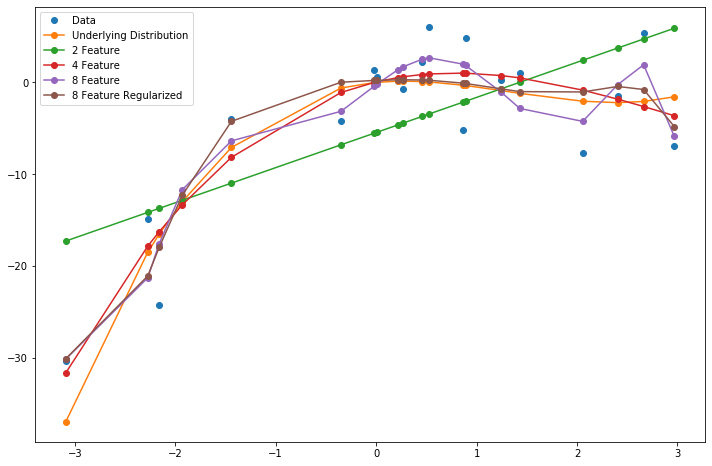

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value by the name MEDV is missing from the dataframe. It is present in dataset.target.
Let's add that to the df.

In [0]:
df['MEDV'] = dataset.target

Are there any null values in the dataset?

In [0]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

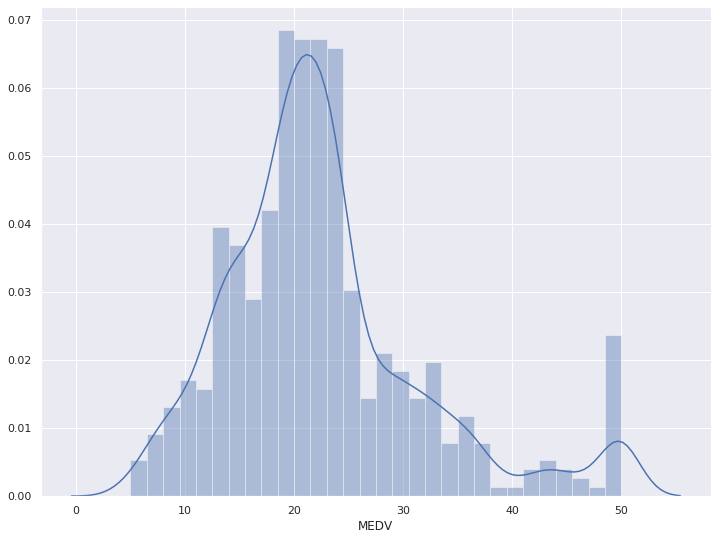

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Assignment

We'll work with the above dataset for the assignment below. Create a blank notebook for the assignment.

### Question 1


1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1]

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Splitting and Scaling Data

In [0]:
# Defining X and Y
X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:,-1]).reshape(-1,1)

In [0]:
# Splitting data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [0]:
# Initializing Standard Scaler class and fitting it to X_train data
s = StandardScaler()
s.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# Transforming both X_train and X_val with means and stds of X_train
X_train = s.transform(X_train)
X_val = s.transform(X_val)

In [0]:
# Stacking bias column to X_train
X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_val = np.hstack((np.ones((X_val.shape[0],1)),X_val))

#### Plotting Train Error and Val Error Versus Lambda

In [0]:
LAMBDAS = list(range(101))
features = X_train.shape[1]
train_errors = []
val_errors = []

for lambda_ in LAMBDAS:
    # Calculating w using closed form solution
    w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (lambda_)*np.identity(features)), np.dot(X_train.T, Y_train))

    # Calculating train and val errors (MSE with with half factors NO REG TERM) 
    train_error = 0.5*np.sum((np.dot(X_train,w) - Y_train)**2)/X_train.shape[0]
    val_error = 0.5*np.sum((np.dot(X_val,w) - Y_val)**2)/X_val.shape[0]

    # Appending errors to empty lists
    train_errors.append(train_error)
    val_errors.append(val_error)

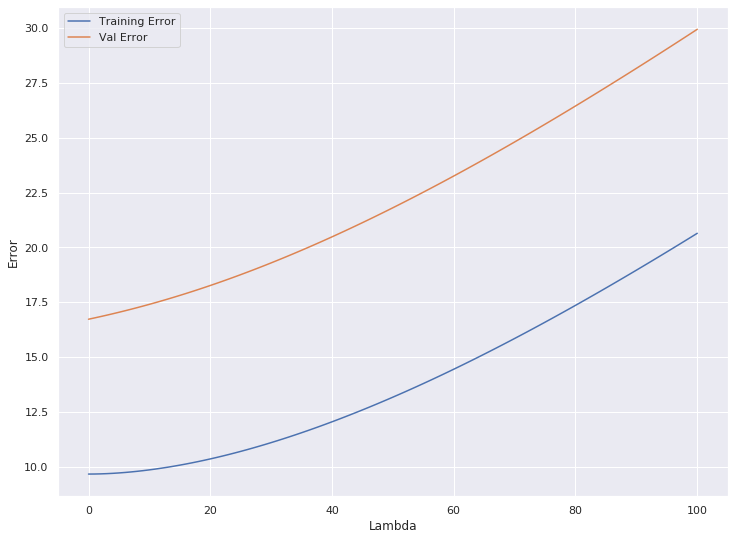

In [0]:
# Plotting results
plt.plot(LAMBDAS, train_errors, label="Training Error") 
plt.plot(LAMBDAS, val_errors, label = "Val Error")
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.show()

#### Computing Best Lambda for Train and Val Sets
> The lowest validation error occurs when: $$\lambda = 0$$<br>The lowest training error occurs when: $$\lambda = 0$$
**Hence, we will pick 0 as our lambda here on out based on the best lambda for validation**

In [0]:
print("Lambda for Lowest Train Error:",LAMBDAS[np.argmin(train_errors)])
print("Lambda for Lowest Val Error:",LAMBDAS[np.argmin(val_errors)])

Lambda for Lowest Train Error: 0
Lambda for Lowest Val Error: 0


### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

#### Derivation of $L_{2}$ objective

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$

$\frac{dJ(\theta)}{d\theta_{j}} = \frac{d}{d\theta_{j}}[\frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]]$

$\frac{dJ(\theta)}{d\theta_{j}} = \frac{1}{2m}[\sum_{i=1}^m\frac{d}{d\theta_{j}}[(h_\theta (x^{(i)}) - y^{(i)})^2] + \frac{d}{d\theta_{j}}[\lambda\sum_{j=1}^n\theta^2_j]]$

$\frac{dJ(\theta)}{d\theta_{j}} = \frac{1}{2m}[\sum_{i=1}^m2(h_\theta (x^{(i)}) - y^{(i)}) x_{j}^{(i)} + 2\lambda\theta_{j}]$

$\frac{dJ(\theta)}{d\theta_{j}} = \frac{1}{m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)}) x_{j}^{(i)} + \lambda\theta_{j}]$

### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]
> Most of the weights from GD are within 20% of the weights of the analytical (closed form) solution as seen in the table. Only 3 of the weights are different by more than 20%

#### Implementation of **Full Batch** Gradient Descent


In [0]:
# Function to run one Gradient Descent Step with L2 regularization
def gradDescent(X, y_pred, y_actual, w, λ, lr = 0.01):
    # Compute residuals
    residuals = y_pred - y_actual

    # Compute gradient
    grad = np.dot(X.T, residuals) + λ*w

    # Gradient update
    w = w - (lr/X.shape[0])*grad
    
    return w

# This function computes L2 regularized cost
def compute_cost(y_pred, y_actual, w, λ):
    # Compute residuals
    residuals = y_pred - y_actual

    # residuals cost
    res_cost = np.sum(residuals**2)

    # regularization cost
    reg_cost = λ*np.sum(w**2)

    return (res_cost + reg_cost)/(2*y_pred.shape[0])

# This function returns training error (MSE with half factor NO REG TERM)
def trainingError(y_pred, y_actual):
    residuals = y_pred - y_actual
    return np.sum((residuals)**2)/(y_pred.shape[0]*2)

# This function will run Full Batch GD on a X and y data for a specified number 
# of epochs (iterations)
def fullBatchGD(X, y, w, λ = 0, lr = 0.01, iterations = 1000):
    # This implementation assumes that X has a bias column 
    # Matrix dimensions
    m, n = X.shape
    
    # Initializing storage variables
    costHistory = np.zeros(iterations)
    trainingErrorHistory = np.zeros(iterations)
    
    for _ in range(iterations):
        # Compute predictions
        y_pred = np.dot(X,w)
        
        # Compute cost
        cost = compute_cost(y_pred, y, w, λ)
        costHistory[_] = cost
        
        # Compute training error
        t_error = trainingError(y_pred, y)
        trainingErrorHistory[_] = t_error
        
        # Gradient Descent
        w = gradDescent(X = X, y_pred = y_pred, y_actual = y, w = w, λ = λ, lr = lr)
    
    return w, costHistory, trainingErrorHistory

In [0]:
np.random.seed(42)
w_gd, costHistory, _ = fullBatchGD(X_train, Y_train, w = np.random.randn(14,1))

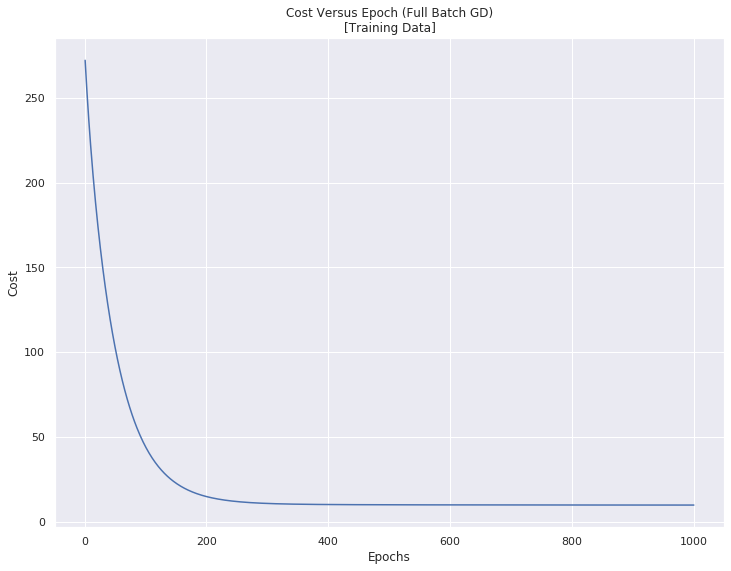

In [0]:
plt.plot(list(range(1,1001)), costHistory)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Versus Epoch (Full Batch GD)\n[Training Data]")
plt.show()

#### Comparison of Matrix and GD Solutions

In [0]:
# Matrix Solution
LAMBDA = 0
w_closed_form = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (LAMBDA)*np.identity(features)), np.dot(X_train.T, Y_train))

In [0]:
display(pd.DataFrame(np.hstack((w_gd, w_closed_form, np.abs((w_gd - w_closed_form)/w_closed_form)*100)), columns = ["Gradient Descent Weights", "Closed Form Solution Weights", "% Difference of GD from Closed Form"]))

,Gradient Descent Weights,Closed Form Solution Weights,% Difference of GD from Closed Form
0,22.610926,22.611881,0.004222
1,-0.852278,-0.970820,12.210533
2,0.885898,1.057149,16.199272
3,-0.082721,0.038311,315.918677
4,0.632005,0.594506,6.307466
5,-1.505556,-1.855148,18.844411
6,2.715210,2.573219,5.518024
7,-0.084000,-0.087615,4.126515
8,-2.490718,-2.880943,13.545022
9,1.428810,2.112245,32.355892


### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

#### Training Error Versus Number of Epochs for Different Learning Rates

In [0]:
# Learning Rates
LEARNING_RATES = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# Initializing storage variable
TRAINING_ERRS = []

# Initializing random w
np.random.seed(42)
W = np.random.randn(14,1)

# Looping through learning rates and collecting training errors
for lr in LEARNING_RATES:
    w_gd, costHistory, trainingErrorHistory = fullBatchGD(X_train, Y_train, w = W, lr = lr)
    TRAINING_ERRS.append(trainingErrorHistory)

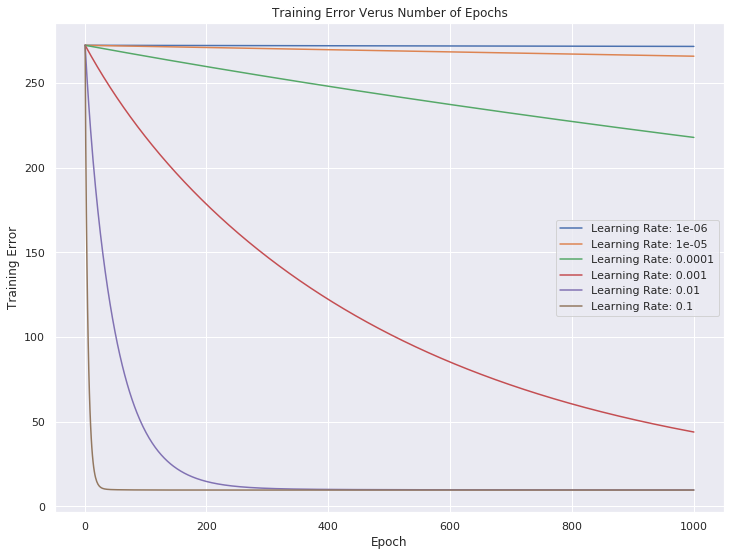

In [0]:
# Plotting results
for count, err in enumerate(TRAINING_ERRS):
    plt.plot(list(range(1,1001)), err, label = f"Learning Rate: {LEARNING_RATES[count]}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Error")
plt.legend()
plt.title("Training Error Verus Number of Epochs")
plt.show()

### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]
> This answer is based on 20 iterations and Learning Rate 0.01, as stated in the announcement.<br><br>**Fastest convergence in terms of # of grad updates:** Very difficult to say. B=1 and B=16 have very similar performance looking at the zoomed in plot. In this case, I might say B=16 only because B=1 has noisier data but that may not be the case if the random seed was different or the splits were different<br> **Fastest convergence in terms of wall-clock time:** B=16 converges the quickest<br><br>considering both wall-clock time and # of grad updates, B=16 seems to be the better choice overall.

In [0]:
import time

#### Implementation of Mini Batch GD with SE Loss and $L_{2}$ Regularization

In [0]:
def batchGradientDescent(X, y, w, lr=0.01, iterations=20, λ=0, bs=1):
    # This implementation assumes that X already has a bias column
    # m is the nunmber of data points, n is the number of features
    m, n = X.shape

    # these are used to stored the time
    timeHistory = np.zeros(iterations)
    wallclock = np.zeros(iterations)
    gradupdates = []
    
    for i in range(iterations):
        # Store the current time
        start_time = time.time()
        
        # Randomize X and Y
        indexes = np.random.permutation(m)
        X_randomized = X[indexes,:]
        y_randomized = y[indexes]
        
        # Loop through the shuffled dataset in mini batches
        for j in range(0, m, bs):
            # This code checks whether the next batch is the last batch of the 
            # randomized dataset
            if j+bs >= m:
                mini_x = X_randomized[j:]
                mini_y = y_randomized[j:]
            else:
                mini_x = X_randomized[j:j+bs]
                mini_y = y_randomized[j:j+bs]
            
            # Prediction of mini batch
            y_pred = np.dot(mini_x,w)

            # Calculating residual
            residuals = y_pred - mini_y

            # Calculating L2 regularized gradient
            grad = np.dot(mini_x.T, residuals) + λ*w

            # Updating weights based on learning rate and batch size
            w -= (lr/bs)*grad

            # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
            te_after_update = 0.5*np.sum((np.dot(X_randomized, w) - y_randomized)**2)/m
            gradupdates.append(te_after_update)

        # Calculating time taken for iteration in microseconds   
        time_taken = time.time() - start_time
        
        # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
        te_wallclock = 0.5*np.sum((np.dot(X_randomized, w) - y_randomized)**2)/m

        timeHistory[i] = time_taken
        wallclock[i] = te_wallclock
        
    return w, timeHistory, gradupdates, wallclock

In [0]:
# Batch sizes to test
BATCH_SIZES = [1, 16, 128, 256, 404]

# Initializing storage variables
TIME_HISTORIES = []
GRAD_UPDATES = []
WALL_CLOCK = []

for bs in BATCH_SIZES:
    # Initializing random w
    np.random.seed(42)
    W = np.random.randn(14,1)
    
    w, timeHistory, gradupdates, wallclock = batchGradientDescent(X_train, Y_train, w = W, lr=0.01, iterations=20, bs=bs)
    GRAD_UPDATES.append(gradupdates)
    WALL_CLOCK.append(wallclock)
    TIME_HISTORIES.append(timeHistory)

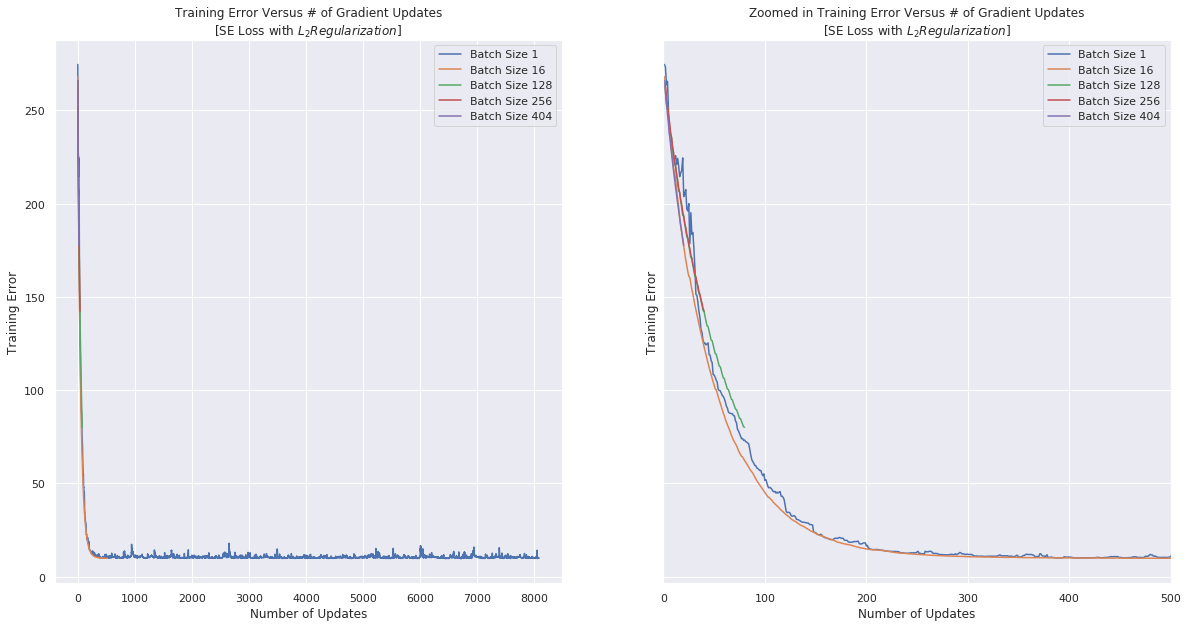

In [0]:
# Plotting training error versus gradient updates
fig, ax_lst = plt.subplots(1, 2, sharey=True, figsize=(20,10))

for count, update in enumerate(GRAD_UPDATES):
    ax_lst[0].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[count]}")
    ax_lst[1].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[count]}")

for ax in ax_lst:
  ax.set_xlabel("Number of Updates")
  ax.set_ylabel("Training Error")
  ax.legend()

ax_lst[0].title.set_text("Training Error Versus # of Gradient Updates\n[SE Loss with $L_{2} Regularization$]")
ax_lst[1].title.set_text("Zoomed in Training Error Versus # of Gradient Updates\n[SE Loss with $L_{2} Regularization$]")
ax_lst[1].set_xlim([-0.01,500])
plt.show()

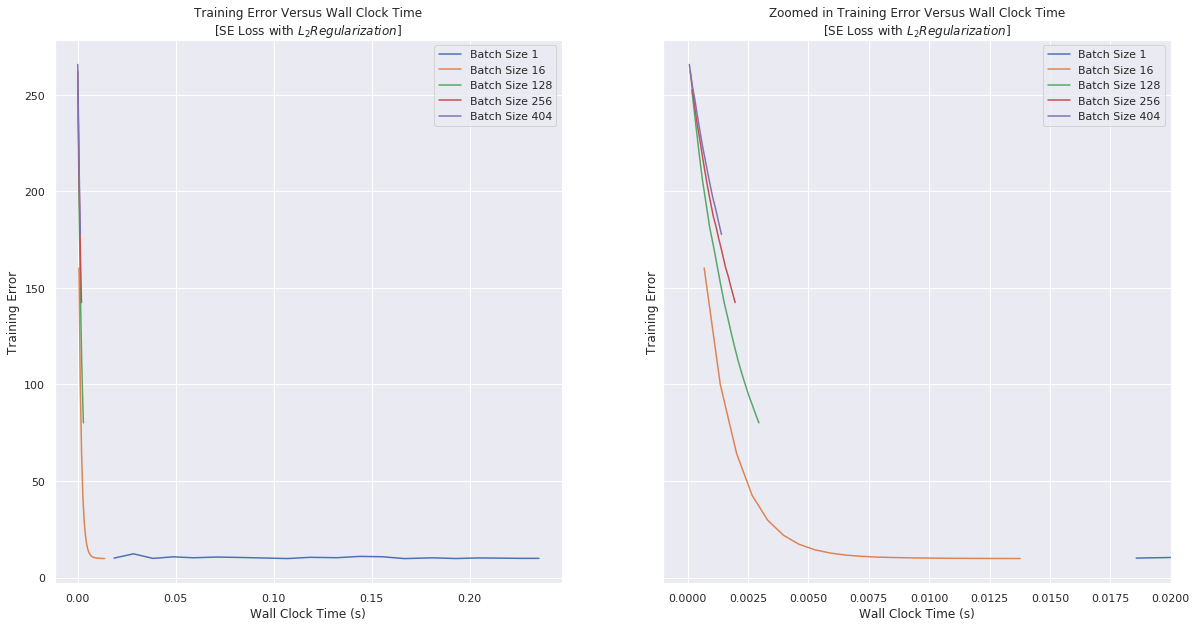

In [0]:
# Plotting training error versus time taken
fig, ax_lst = plt.subplots(1, 2, sharey=True, figsize=(20,10))

for count, wall_c in enumerate(WALL_CLOCK):
    t_hist = TIME_HISTORIES[count].cumsum()
    ax_lst[0].plot(t_hist, wall_c, label = f"Batch Size {BATCH_SIZES[count]}")
    ax_lst[1].plot(t_hist, wall_c, label = f"Batch Size {BATCH_SIZES[count]}")

for ax in ax_lst:
  ax.set_xlabel("Wall Clock Time (s)")
  ax.set_ylabel("Training Error")
  ax.legend()

ax_lst[0].title.set_text("Training Error Versus Wall Clock Time\n[SE Loss with $L_{2} Regularization$]")
ax_lst[1].title.set_text("Zoomed in Training Error Versus Wall Clock Time\n[SE Loss with $L_{2} Regularization$]")
ax_lst[1].set_xlim([-0.001,0.02])

plt.show()

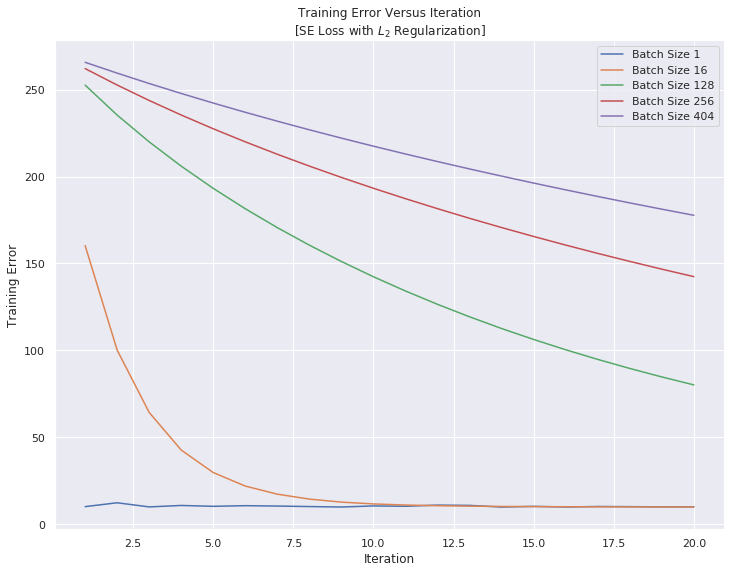

In [0]:
# Plotting training error versus iteration
for count, wall_c in enumerate(WALL_CLOCK):
    plt.plot(list(range(1,21)), wall_c, label = f"Batch Size {BATCH_SIZES[count]}")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Training Error")
plt.title("Training Error Versus Iteration\n[SE Loss with $L_{2}$ Regularization]")
plt.show()

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]


2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]
> We tuned $\eta$ and B using absolute error loss and found that the best $\eta=0.1$ and B=4.<br><br>We see that training with squared error loss is quicker than training with absolute error loss, because the training error converges much more quickly (based on the plots of training error vs. # of updates, wall clock time and iterations). This could be because squared error loss uses a quadratic loss function (linear gradient function), while absolute error loss uses a piecewise-linear function (constant piecewise gradient function). Squared error loss will be more sensitive to outliers because of the linear gradient function and so is more likely to take bigger steps at the start of gradient descent, resulting in fast convergence. Absolute loss, on the other hand, is less sensitive to outliers and will only take gradient steps with magnitude of +1 or -1, resulting in smaller steps and slower convergence.<br><br>For $\eta$=0.1 and B=4, training with squared error loss is much more noisy than training with absolute loss based on the plot of training error versus # of updates. In this light, training with squared error could be more difficult to train with than training with absolute error loss because the training error does not converge to a stable value. This result could arise from the fact that squared error loss is quadratic and more sensitive to outliers. Hence, points that do not lie on the line can perturb the training error significantly. Absolute loss, on the other hand, is linear and less sensitive to outliers, which means that points that do not lie on the line aren't penalized as much, resulting in less perturbations in training error.<br><br>After tuning $\eta$ and B for squared error loss, we find that the best $\eta$=0.01 and B=16.<br><br>We observe that training with squared error converges and has no noise while training with absolute error does not converge. This supports the idea explained earlier: training with absolute error loss is much slower than training with than squared error loss.<br><br>Based on the two $\eta$s and Bs tested above, it is apparent that training with squared error loss is much quicker than training with absolute error loss. This phenomenon can be partly attributed to the fact that squared error loss has a linear gradient, while absolute error loss has a constant gradient. Hence, squared error loss can take bigger gradient steps than absolute error loss, and converge more quickly. However, we do note that training with squared error loss can be more noisy so we need to pay closer attention to tuning learning rate. Ultimately, deciding which loss to use depends on the problem you're working on. If you're looking for quick convergence, training with squared error loss could be better because of the linear gradient function and larger gradient steps, while absolute error loss could be better to use when you have a lot of inherent noise in the data and do not want to penalize points that lie outside the line. If special attention is paid to tuning learning rate, training with squared error loss can be better, because it converges more quickly.

#### Derivation of Absolute Error Gradient with $L_{2}$ regularization

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m|(h_\theta (x^{(i)}) - y^{(i)}| + \lambda\sum_{j=1}^n\theta^2_j]$

$\frac{dJ(\theta)}{d\theta_{j}} = \frac{d}{d\theta_{j}}[\frac{1}{2m}[\sum_{i=1}^m|h_\theta (x^{(i)}) - y^{(i)}| + \lambda\sum_{j=1}^n\theta^2_j]]$

$\frac{dJ(\theta)}{d\theta_{j}} = \frac{1}{2m}[\sum_{i=1}^m\frac{d}{d\theta_{j}}[|h_\theta (x^{(i)} - y^{(i)})|] + \frac{d}{d\theta_{j}}[\lambda\sum_{j=1}^n\theta^2_j]]$

$\frac{dJ(\theta)}{d\theta_{j}} = \frac{1}{m}[\sum_{i=1}^m\frac{|h_\theta (x^{(i)}) - y^{(i)}| x_{j}^{(i)}}{2(h_\theta (x^{(i)}) - y^{(i)})} + \lambda\theta_{j}]$

Note that the gradient will be undefined when $h_\theta (x^{(i)}) - y^{(i)} = 0$ but that is unlikely to happen in computational code because of numerical reasons

#### Implementation of Mini-Batch GD with Absolute Loss and $L_{2}$ Regularization

In [0]:
def batchGradientDescentAbs(X, y, w, lr=0.01, iterations=20, λ=0, bs=1):
    # This implementation assumes that X already has a bias column
    # m is the nunmber of data points, n is the number of features
    m, n = X.shape

    # these are used to stored the time
    timeHistory = np.zeros(iterations)
    wallclock = np.zeros(iterations)
    gradupdates = []
    
    for i in range(iterations):
        # Store the current time
        start_time = time.time()
        
        # Randomize X and Y
        indexes = np.random.permutation(m)
        X_randomized = X[indexes,:]
        y_randomized = y[indexes]
        
        # Loop through the shuffled dataset in mini batches
        for j in range(0, m, bs):
            # This code checks whether the next batch is the last batch of the 
            # randomized dataset
            if j+bs >= m:
                mini_x = X_randomized[j:]
                mini_y = y_randomized[j:]
            else:
                mini_x = X_randomized[j:j+bs]
                mini_y = y_randomized[j:j+bs]
            
            # Prediction of mini batch
            y_pred = np.dot(mini_x,w)

            # Calculating residual for absolute loss
            # residuals = np.where(y_pred - mini_y > 0, 1, -1)
            residuals = np.sign(y_pred - mini_y)

            # Calculating L2 regularized gradient
            grad = (np.dot(mini_x.T, residuals)/2) + λ*w

            # Updating weights based on learning rate and batch size
            w -= (lr/bs)*grad

            # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
            te_after_update = 0.5*np.sum((np.dot(X_randomized, w) - y_randomized)**2)/m
            gradupdates.append(te_after_update)

        # Calculating time taken for iteration in microseconds   
        time_taken = time.time() - start_time
        
        # Calculating training error as MSE with 0.5 factor (NO REG. TERM)
        te_wallclock = 0.5*np.sum((np.dot(X_randomized, w) - y_randomized)**2)/m

        timeHistory[i] = time_taken
        wallclock[i] = te_wallclock
        
    return w, timeHistory, gradupdates, wallclock

#### Tuning $\eta$ and B for Absolute Loss and $L_{2}$ Regularization

In [0]:
LEARNING_RATES = [0.001, 0.01, 0.1, 1]
BATCH_SIZES = [1, 4, 16, 128, 256, 404]

FINAL_TIME_HISTORIES_ABS = []
FINAL_GRAD_UPDATES_ABS = []
FINAL_WALL_CLOCK_ABS = []

for lr in LEARNING_RATES:
  TIME_HISTORIES_ABS = []
  GRAD_UPDATES_ABS = []
  WALL_CLOCK_ABS = []

  for bs in BATCH_SIZES:
    # Initializing random w
    np.random.seed(42)

    w, timeHistory, gradupdates, wallclock = batchGradientDescentAbs(X_train, Y_train, w = np.random.randn(14,1), lr=lr, iterations=20, bs=bs)

    GRAD_UPDATES_ABS.append(gradupdates)
    WALL_CLOCK_ABS.append(wallclock)
    TIME_HISTORIES_ABS.append(timeHistory)

  GRAD_UPDATES_ABS = np.array(GRAD_UPDATES_ABS)
  WALL_CLOCK_ABS = np.array(WALL_CLOCK_ABS)
  TIME_HISTORIES_ABS = np.array(TIME_HISTORIES_ABS)

  FINAL_TIME_HISTORIES_ABS.append(TIME_HISTORIES_ABS)
  FINAL_GRAD_UPDATES_ABS.append(GRAD_UPDATES_ABS)
  FINAL_WALL_CLOCK_ABS.append(WALL_CLOCK_ABS)

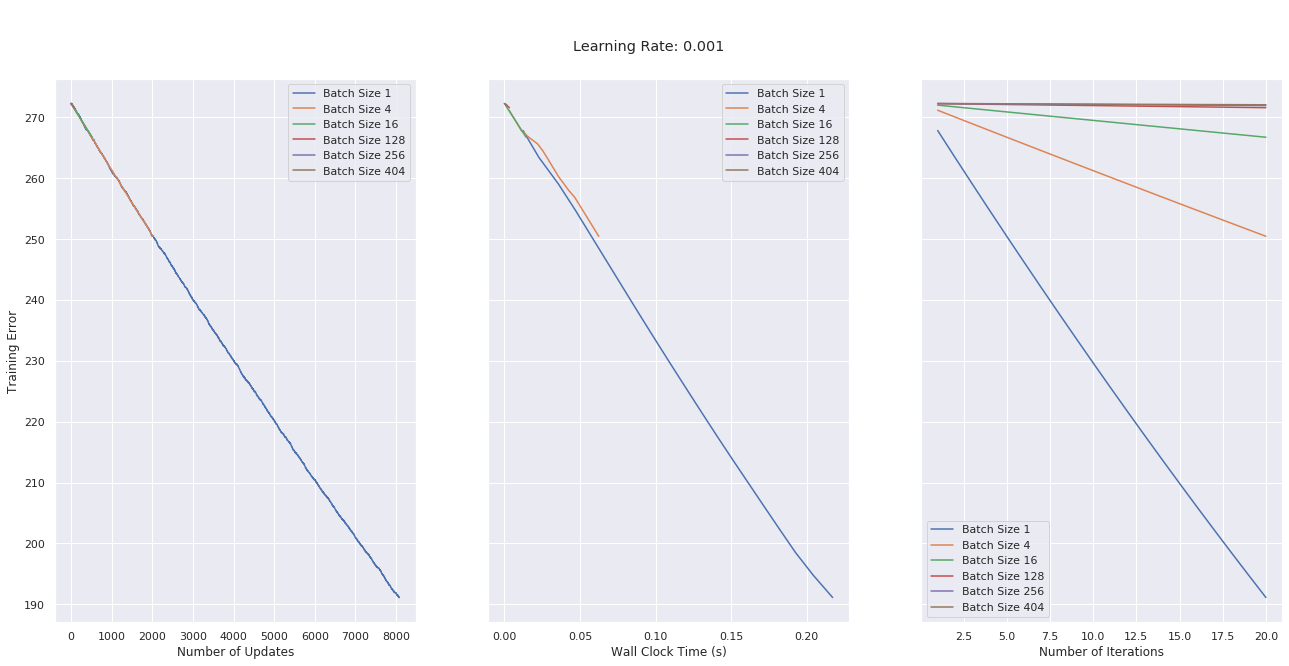

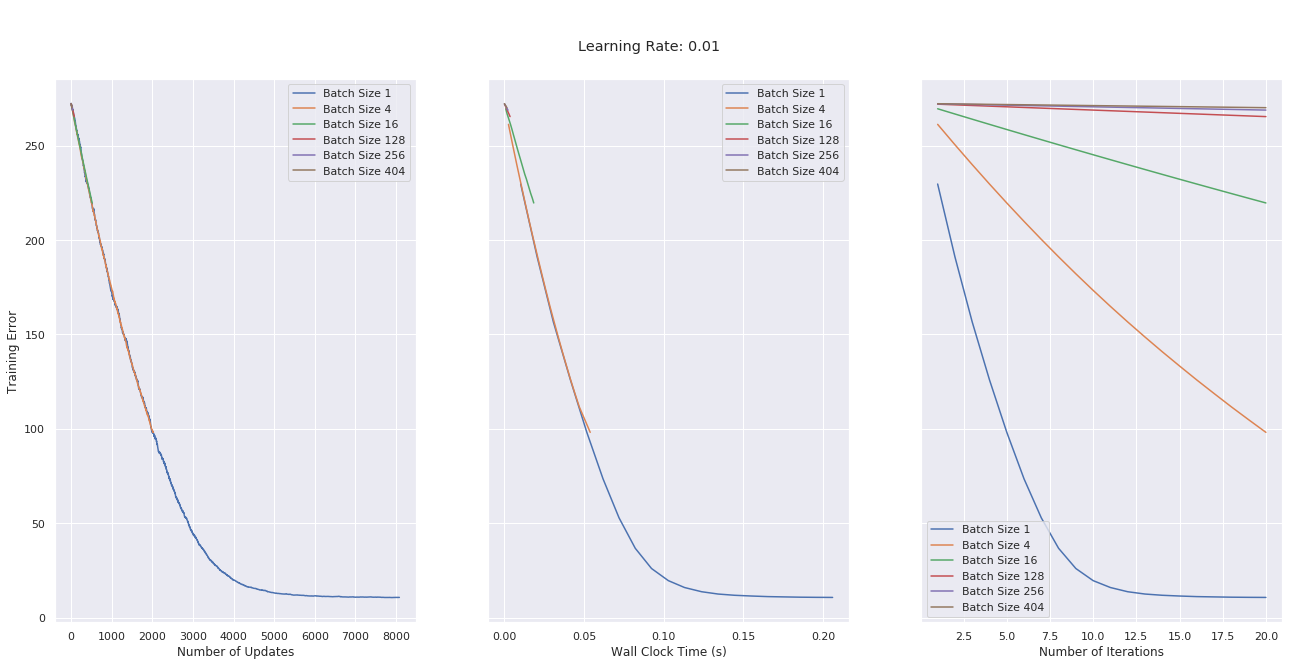

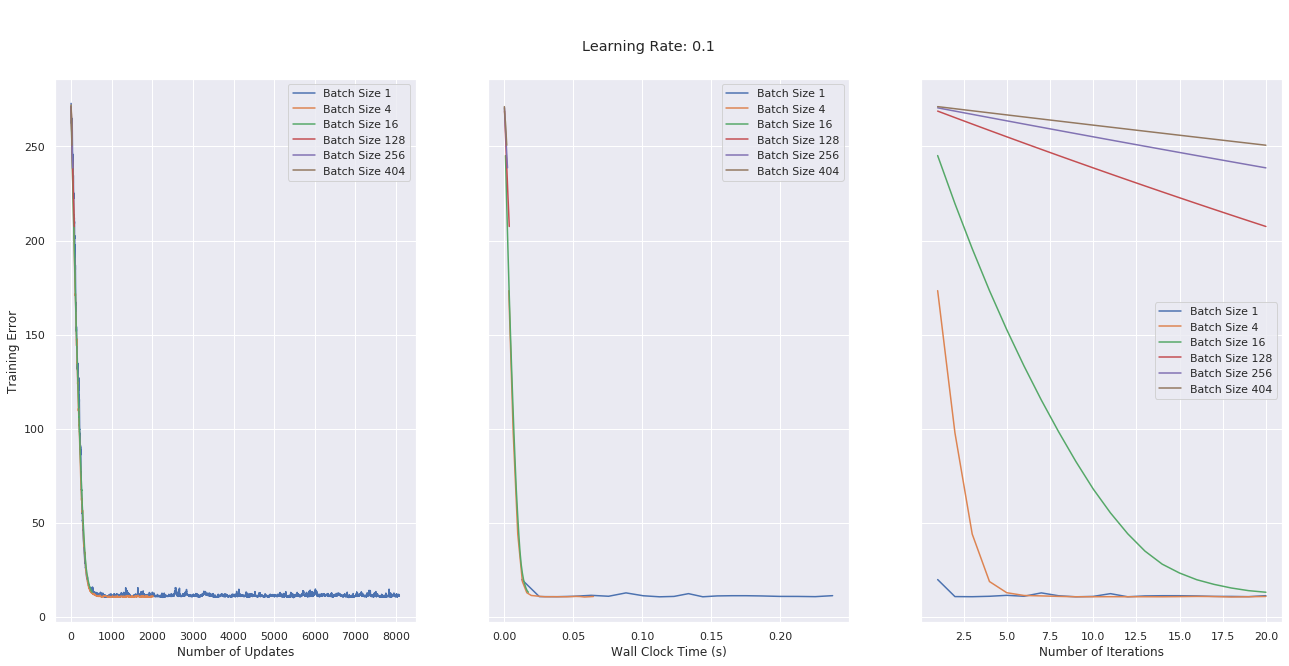

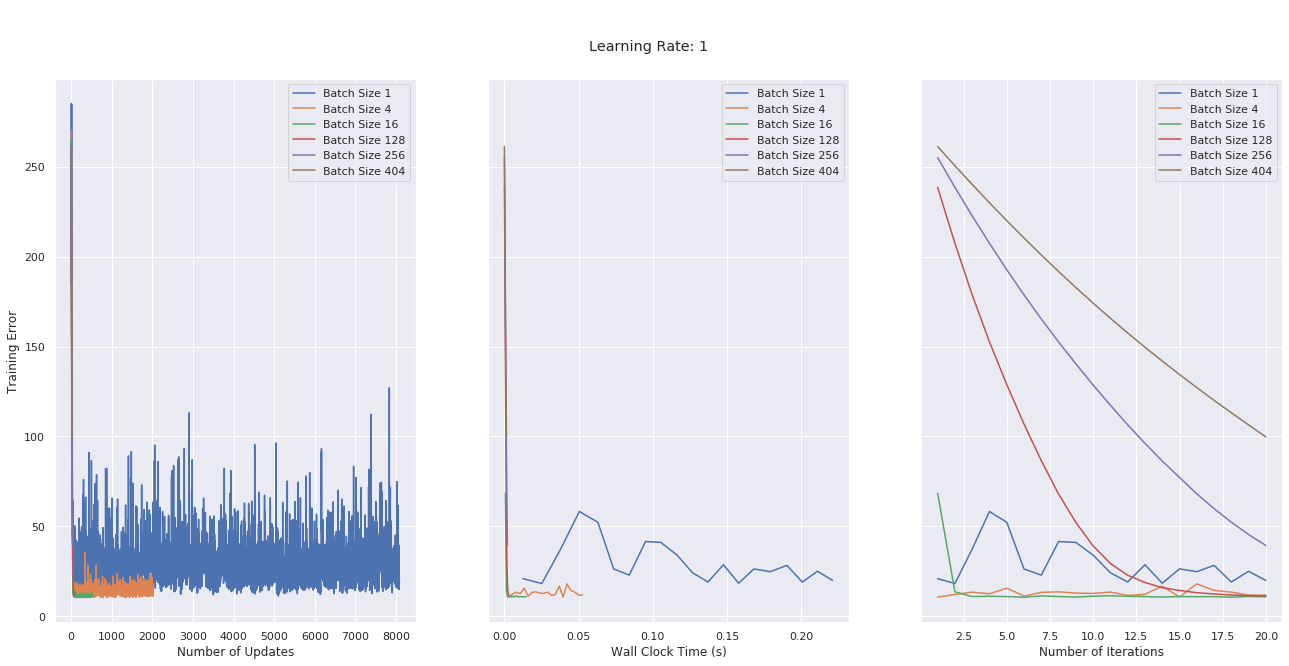

In [0]:
# Plotting training error versus number of gradient updates for different 
# learning rates and batch sizes
for lr_count, figure in enumerate(FINAL_GRAD_UPDATES_ABS):
  fig, ax_lst = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (22,10))
  for bs_count, update in enumerate(figure):
      t_hist = FINAL_TIME_HISTORIES_ABS[lr_count][bs_count].cumsum()
      ax_lst[0].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[bs_count]}")
      ax_lst[1].plot(t_hist, FINAL_WALL_CLOCK_ABS[lr_count][bs_count], label = f"Batch Size {BATCH_SIZES[bs_count]}")
      ax_lst[2].plot(list(range(1,21)), FINAL_WALL_CLOCK_ABS[lr_count][bs_count], label = f"Batch Size {BATCH_SIZES[bs_count]}")

      ax_lst[0].set_xlabel("Number of Updates")
      ax_lst[1].set_xlabel("Wall Clock Time (s)")
      ax_lst[2].set_xlabel("Number of Iterations")

      for ax in ax_lst:
        ax.legend()
      ax_lst[0].set_ylabel("Training Error")
      fig.suptitle(f"\n\nLearning Rate: {LEARNING_RATES[lr_count]}")
plt.show()

Based on the plots above, it is apparent that for 20 iterations, the learning rate 1 is too high and so is overshooting, resulting in a lot of noise in training error over updates, time and iterations for most batch sizes. Batch size 128 converges but takes too many iterations to do so. We will ignore this learning rate altogether.

Learning rates of 0.001 takes does not converge for any of the batch sizes within 20 iterations so we will ignore these results as well. 

**LR=0.1** and **B=4** seems like a good option because it converges more quickly than LR=0.01 and B=1 and LR=0.1 and B=16 and is also less noisy than LR=0.1 and B=1. 

#### Tuning $\eta$ and B for SE Loss and $L_{2}$ Regularization

In [0]:
LEARNING_RATES = [0.001, 0.01, 0.1, 1]
BATCH_SIZES = [1, 4, 16, 128, 256, 404]

FINAL_TIME_HISTORIES_SE = []
FINAL_GRAD_UPDATES_SE = []
FINAL_WALL_CLOCK_SE = []

for lr in LEARNING_RATES:
  TIME_HISTORIES_SE = []
  GRAD_UPDATES_SE = []
  WALL_CLOCK_SE = []

  for bs in BATCH_SIZES:
    # Initializing random w
    np.random.seed(42)

    w, timeHistory, gradupdates, wallclock = batchGradientDescent(X_train, Y_train, w = np.random.randn(14,1), lr=lr, iterations=20, bs=bs)

    GRAD_UPDATES_SE.append(gradupdates)
    WALL_CLOCK_SE.append(wallclock)
    TIME_HISTORIES_SE.append(timeHistory)

  GRAD_UPDATES_SE = np.array(GRAD_UPDATES_SE)
  WALL_CLOCK_SE = np.array(WALL_CLOCK_SE)
  TIME_HISTORIES_SE = np.array(TIME_HISTORIES_SE)

  FINAL_TIME_HISTORIES_SE.append(TIME_HISTORIES_SE)
  FINAL_GRAD_UPDATES_SE.append(GRAD_UPDATES_SE)
  FINAL_WALL_CLOCK_SE.append(WALL_CLOCK_SE)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply


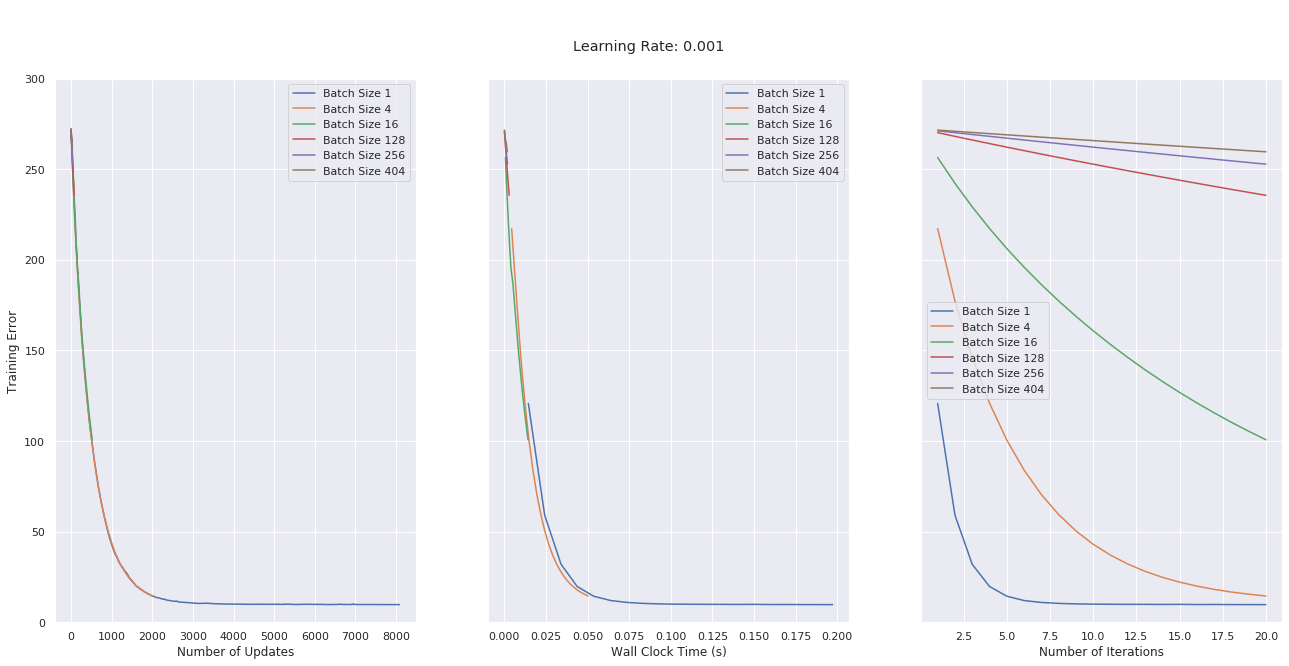

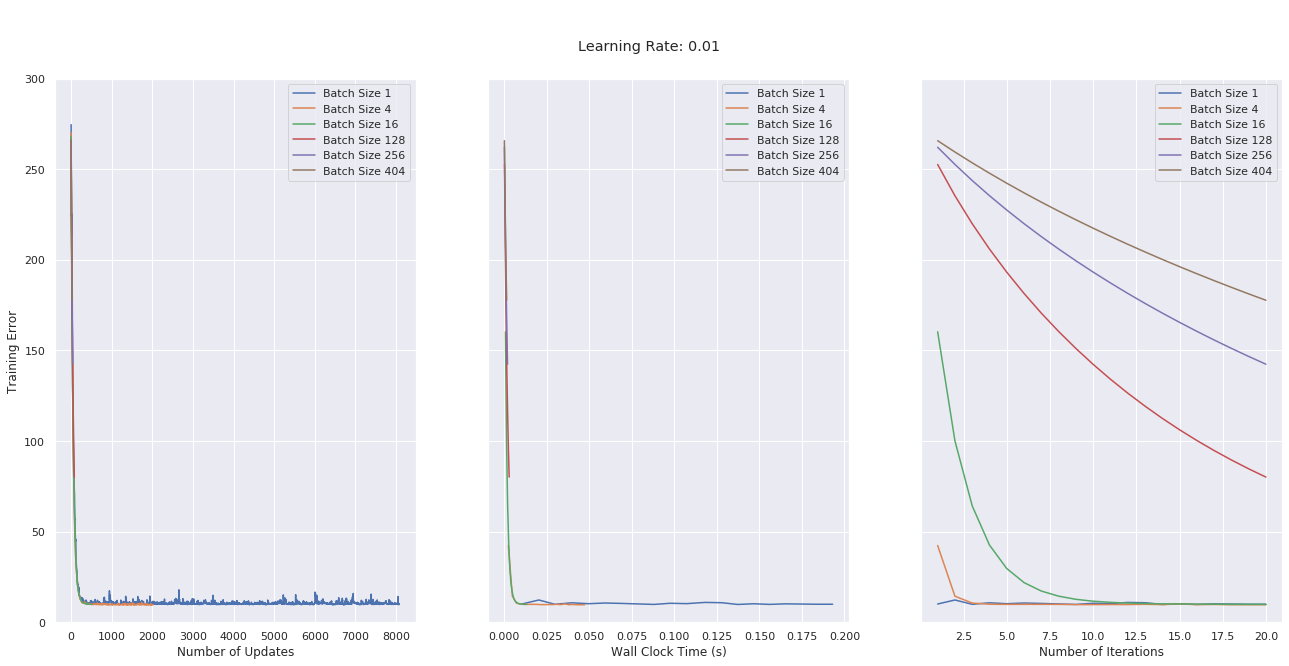

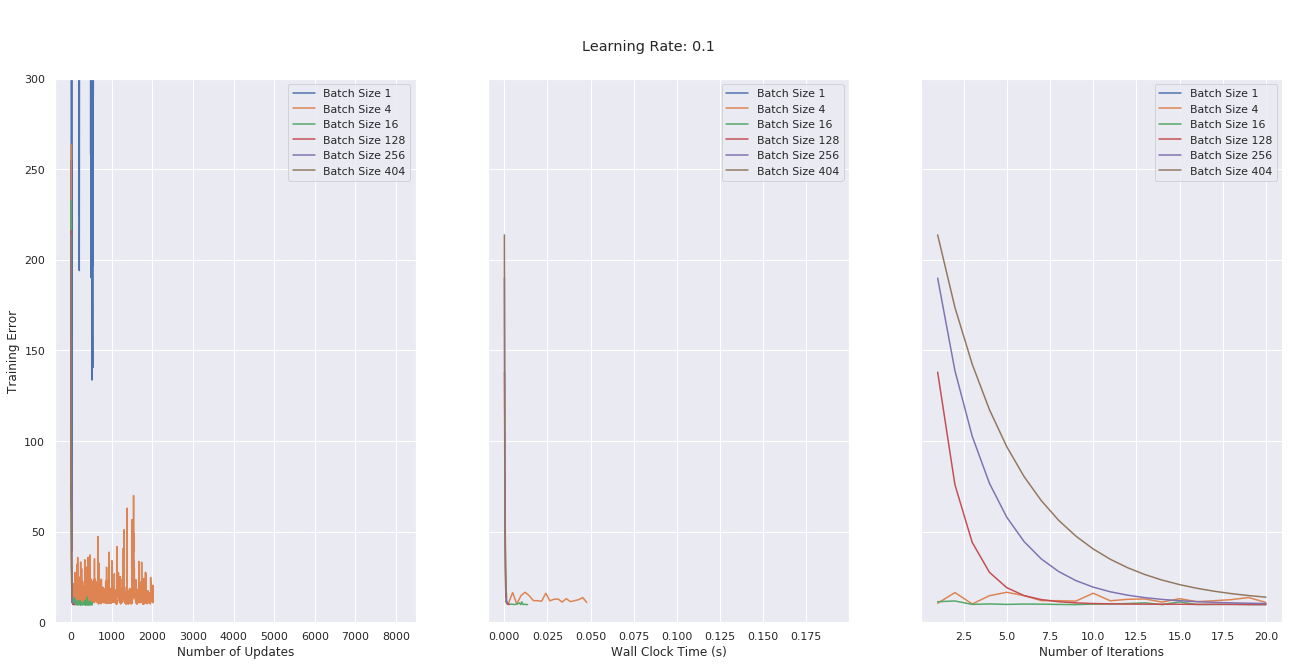

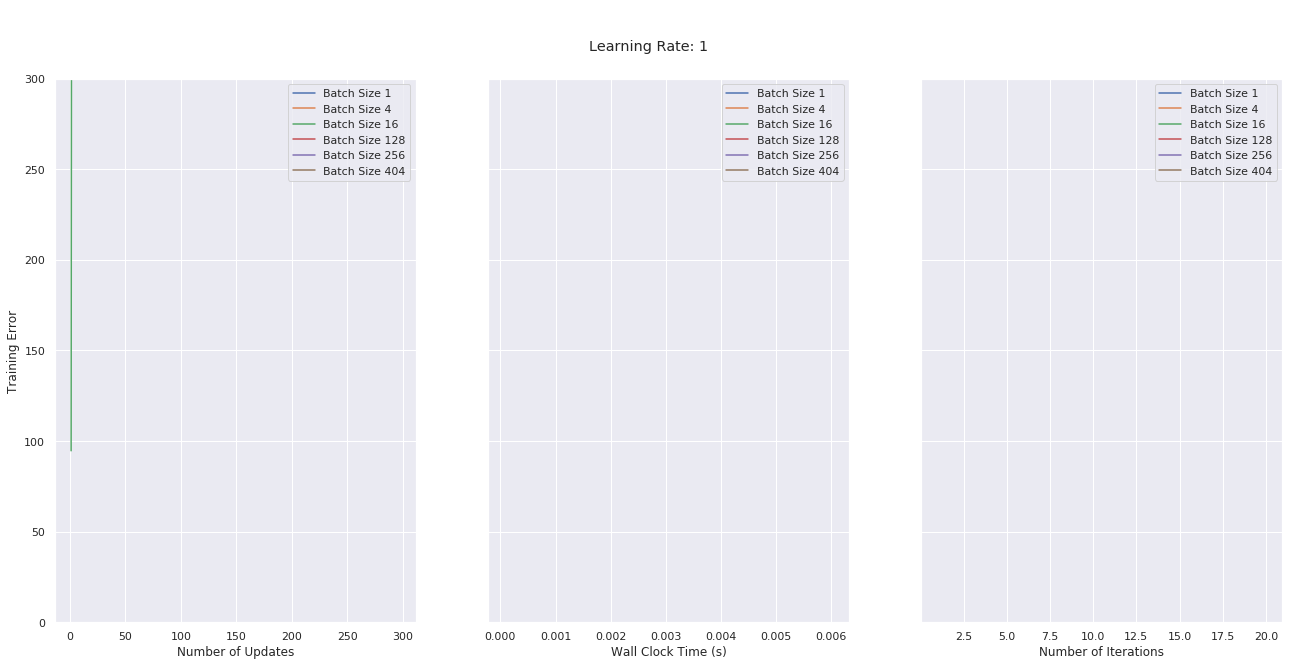

In [0]:
# Plotting training error versus number of gradient updates for different 
# learning rates and batch sizes
for lr_count, figure in enumerate(FINAL_GRAD_UPDATES_SE):
  fig, ax_lst = plt.subplots(nrows = 1, ncols = 3, sharey = True, figsize = (22,10))
  for bs_count, update in enumerate(figure):
      t_hist = FINAL_TIME_HISTORIES_SE[lr_count][bs_count].cumsum()
      ax_lst[0].plot(list(range(1, len(update)+1)), update, label = f"Batch Size {BATCH_SIZES[bs_count]}")
      ax_lst[1].plot(t_hist, FINAL_WALL_CLOCK_SE[lr_count][bs_count], label = f"Batch Size {BATCH_SIZES[bs_count]}")
      ax_lst[2].plot(list(range(1,21)), FINAL_WALL_CLOCK_SE[lr_count][bs_count], label = f"Batch Size {BATCH_SIZES[bs_count]}")

      ax_lst[0].set_xlabel("Number of Updates")
      ax_lst[1].set_xlabel("Wall Clock Time (s)")
      ax_lst[2].set_xlabel("Number of Iterations")

      for ax in ax_lst:
        ax.legend()
        ax.set_ylim([-0.01,300])
      ax_lst[0].set_ylabel("Training Error")
      fig.suptitle(f"\n\nLearning Rate: {LEARNING_RATES[lr_count]}")
plt.show()

Based on the plots above, it is apparent that for 20 iterations, the learning rate 1 is too high because none of the batch sizes converge to the minimum training error. Learning rate 0.1 does converge for almost all of the batch sizes. Batch sizes >= 128 converge too slowly, while batch sizes < 128 have too much noise when looking at training error versus number of updates. We will ignore learning rates 1 and 0.1 for these reasons.

Learning rate of 0.001 takes too long to converge for most batch sizes (except batch size 1). Hence, we will ignore this learning rate as well.

**LR=0.01** and **B=4** or **B=16** seem like good options because they converge quickly and are less noisy than LR=0.01 and B=1. I will go with **B=16** only because I would like to test a different batch size in the next section.

#### Training with Squared Error Loss Vs. Training with Absolute Error Loss Using Tuned $\eta$s and Bs

##### LR = 0.1 and B = 4

In [0]:
np.random.seed(42)
B = 4
LR = 0.1

w_mse, timeHistory_mse, gradupdates_mse, wallclock_mse = batchGradientDescent(X_train, Y_train, w = np.random.randn(14,1), lr=LR, iterations=20, bs=B)
w_abs, timeHistory_abs, gradupdates_abs, wallclock_abs = batchGradientDescentAbs(X_train, Y_train, w = np.random.randn(14,1), lr=LR, iterations=20, bs=B)

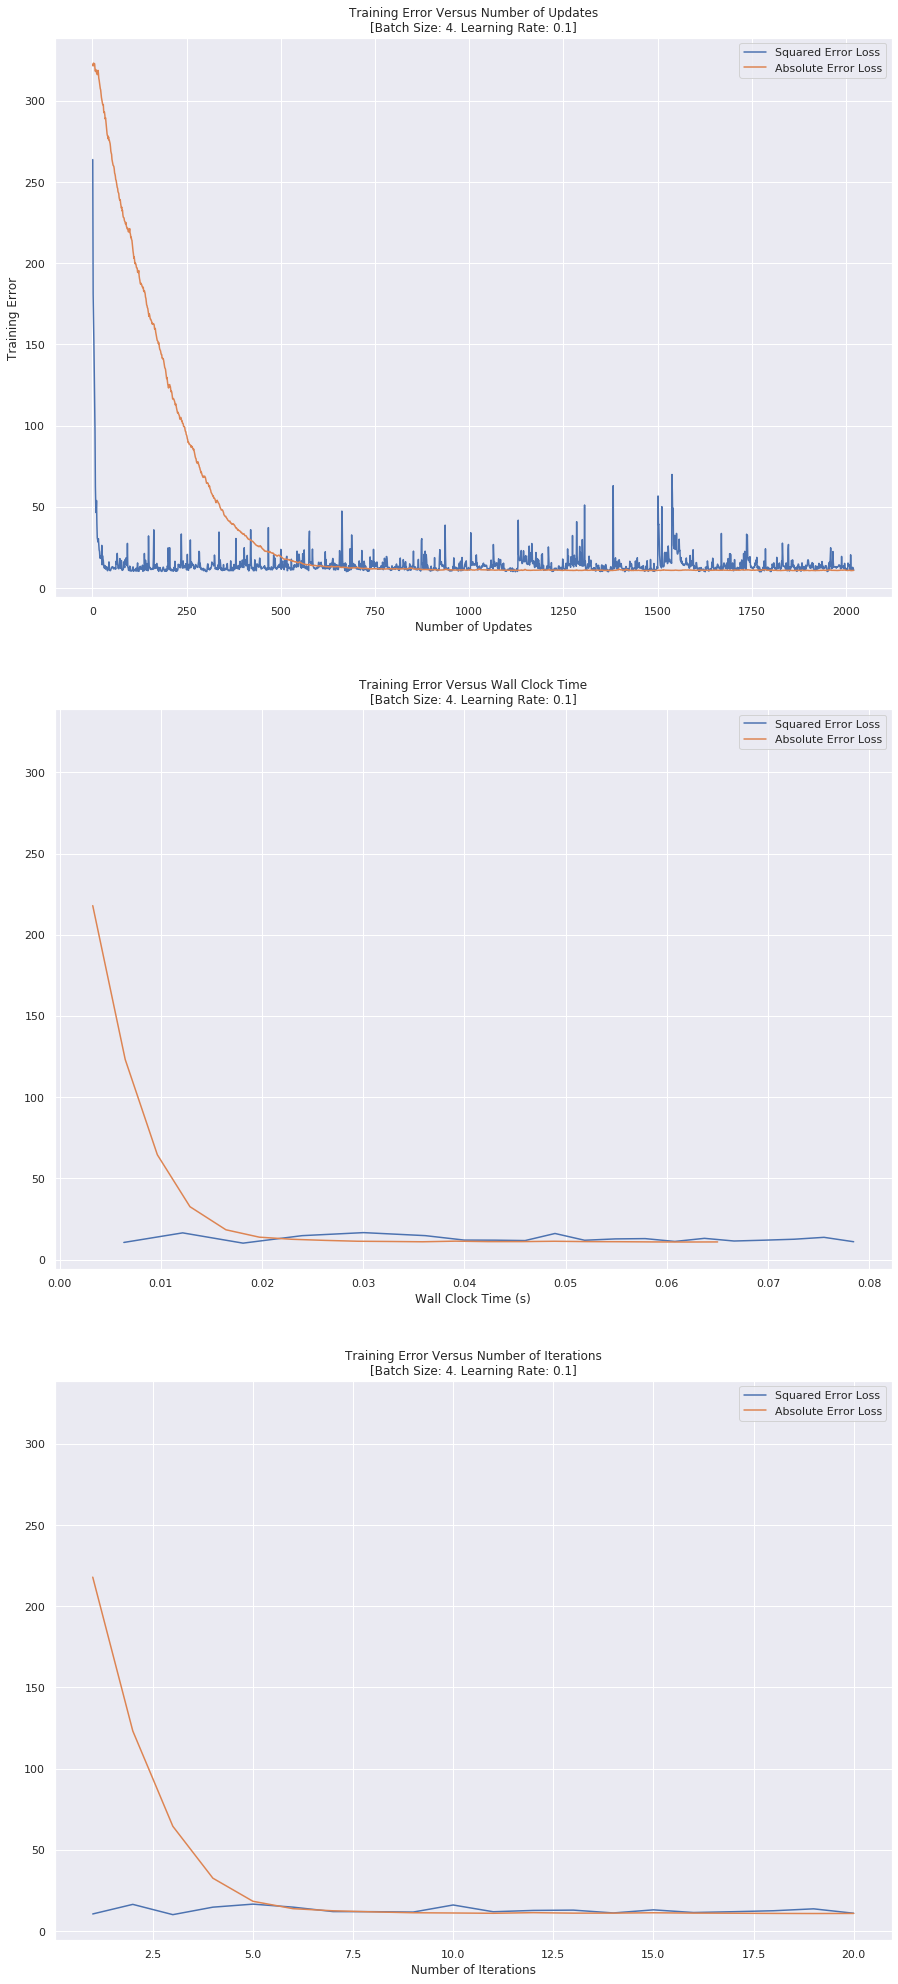

In [0]:
t_hist_mse = timeHistory_mse.cumsum()
t_hist_abs = timeHistory_abs.cumsum()

fig, ax_lst = plt.subplots(nrows = 3, ncols=1, sharey=True, figsize = (15,35))

ax_lst[0].plot(list(range(1,len(gradupdates_mse)+1)), gradupdates_mse, label = "Squared Error Loss")
ax_lst[0].plot(list(range(1,len(gradupdates_abs)+1)), gradupdates_abs, label = "Absolute Error Loss")

ax_lst[1].plot(t_hist_mse, wallclock_mse, label = "Squared Error Loss")
ax_lst[1].plot(t_hist_abs, wallclock_abs, label = "Absolute Error Loss")

ax_lst[2].plot(list(range(1,21)), wallclock_mse, label = "Squared Error Loss")
ax_lst[2].plot(list(range(1,21)), wallclock_abs, label = "Absolute Error Loss")

ax_lst[0].set_ylabel("Training Error")

ax_lst[0].set_xlabel("Number of Updates")
ax_lst[1].set_xlabel("Wall Clock Time (s)")
ax_lst[2].set_xlabel("Number of Iterations")

ax_lst[0].legend()
ax_lst[1].legend()
ax_lst[2].legend()

ax_lst[0].title.set_text(f"Training Error Versus Number of Updates\n[Batch Size: {B}. Learning Rate: {LR}]")
ax_lst[1].title.set_text(f"Training Error Versus Wall Clock Time\n[Batch Size: {B}. Learning Rate: {LR}]")
ax_lst[2].title.set_text(f"Training Error Versus Number of Iterations\n[Batch Size: {B}. Learning Rate: {LR}]")

plt.show()

##### LR = 0.01 and B = 16

In [0]:
np.random.seed(42)
B = 16
LR = 0.01

w_mse, timeHistory_mse, gradupdates_mse, wallclock_mse = batchGradientDescent(X_train, Y_train, w = np.random.randn(14,1), lr=LR, iterations=20, bs=B)
w_abs, timeHistory_abs, gradupdates_abs, wallclock_abs = batchGradientDescentAbs(X_train, Y_train, w = np.random.randn(14,1), lr=LR, iterations=20, bs=B)

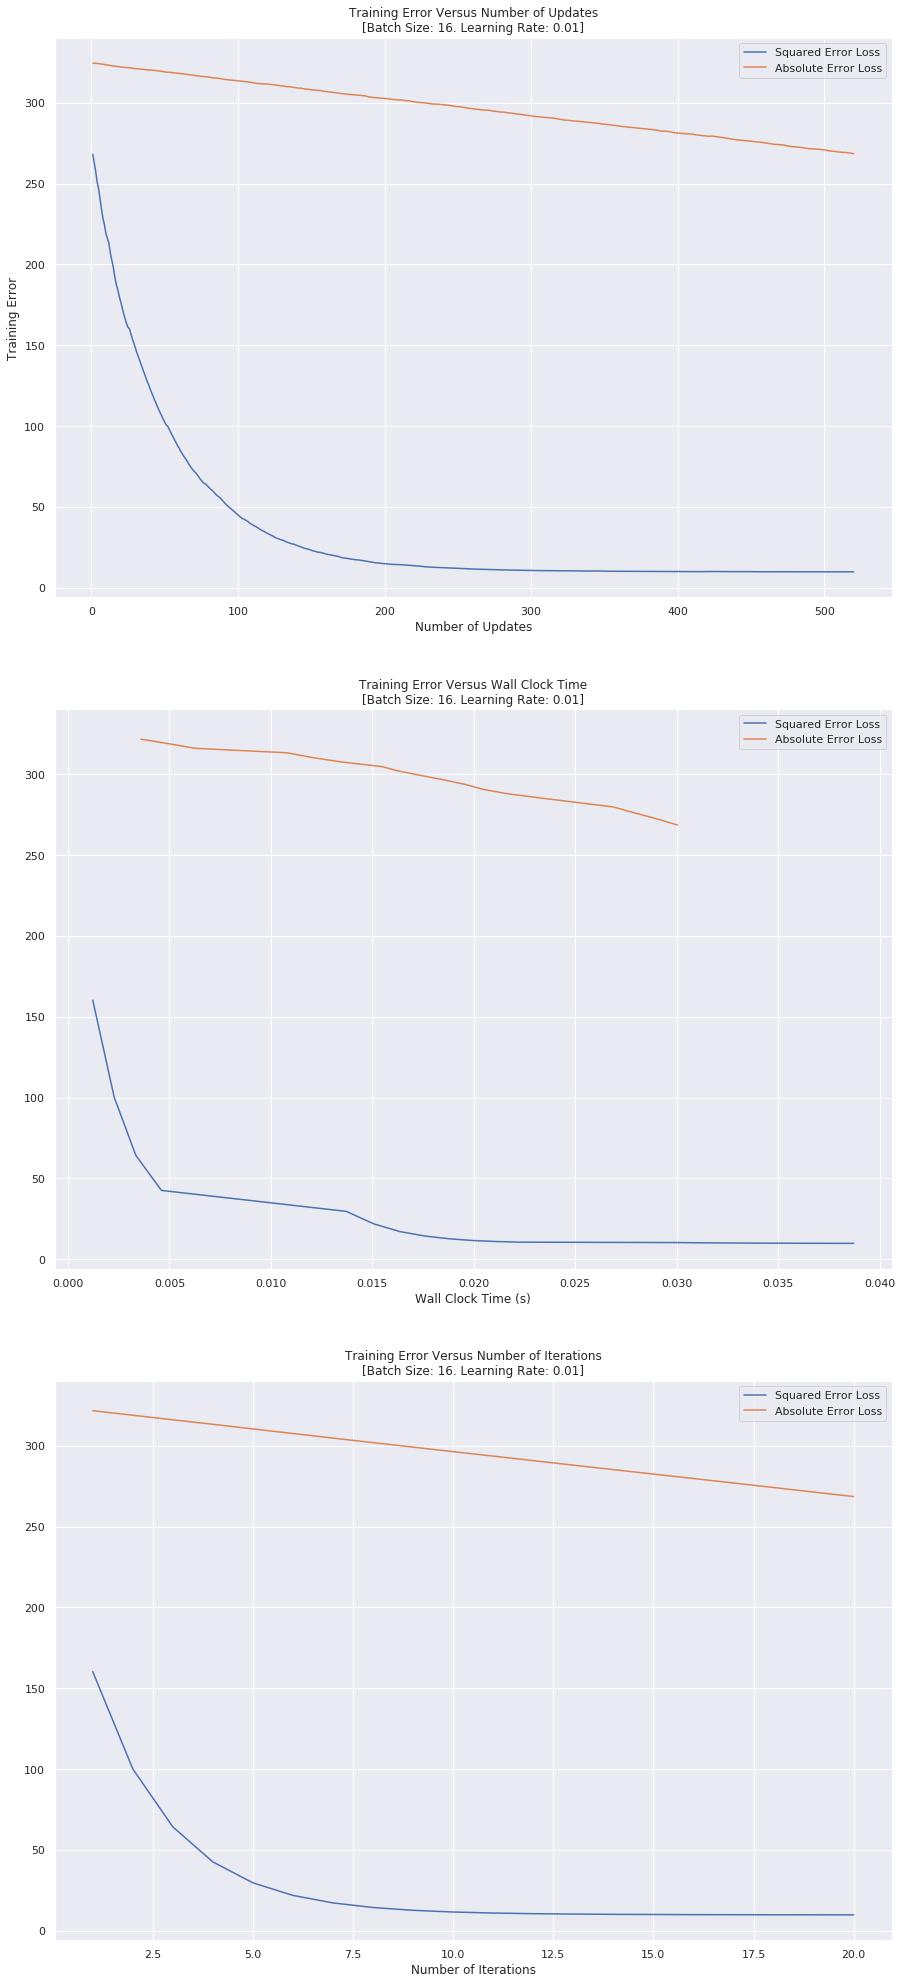

In [0]:
t_hist_mse = timeHistory_mse.cumsum()
t_hist_abs = timeHistory_abs.cumsum()

fig, ax_lst = plt.subplots(nrows = 3, ncols=1, sharey=True, figsize = (15,35))

ax_lst[0].plot(list(range(1,len(gradupdates_mse)+1)), gradupdates_mse, label = "Squared Error Loss")
ax_lst[0].plot(list(range(1,len(gradupdates_abs)+1)), gradupdates_abs, label = "Absolute Error Loss")

ax_lst[1].plot(t_hist_mse, wallclock_mse, label = "Squared Error Loss")
ax_lst[1].plot(t_hist_abs, wallclock_abs, label = "Absolute Error Loss")

ax_lst[2].plot(list(range(1,21)), wallclock_mse, label = "Squared Error Loss")
ax_lst[2].plot(list(range(1,21)), wallclock_abs, label = "Absolute Error Loss")

ax_lst[0].set_ylabel("Training Error")

ax_lst[0].set_xlabel("Number of Updates")
ax_lst[1].set_xlabel("Wall Clock Time (s)")
ax_lst[2].set_xlabel("Number of Iterations")

ax_lst[0].legend()
ax_lst[1].legend()
ax_lst[2].legend()

ax_lst[0].title.set_text(f"Training Error Versus Number of Updates\n[Batch Size: {B}. Learning Rate: {LR}]")
ax_lst[1].title.set_text(f"Training Error Versus Wall Clock Time\n[Batch Size: {B}. Learning Rate: {LR}]")
ax_lst[2].title.set_text(f"Training Error Versus Number of Iterations\n[Batch Size: {B}. Learning Rate: {LR}]")

plt.show()

### Question 7 (Optional)

1. Does the model perform better if polynomial features are added (Use sklearn.preprocessing.PolynomialFeatures to test it out).


2. Does the optimal value of λ (regularization constant) change with this new set of features added.

## References

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Author: Parth Jaggi